# Análisis Exploratorio de Datos Pokemon Stats y Tipos

### Importar librerías 

In [226]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Establecer una apariencia general para todos los gráficos

In [227]:
plt.style.use("seaborn-v0_8-darkgrid")

### Conociendo nuestros datos de Pokemon. 

El conjunto de datos es acerca de Pokemons y viene de dataset de [Pokemon Stats](https://www.kaggle.com/datasets/ulrikthygepedersen/pokemon-stats) de kaggle.

En el Dataset se encuentran generación, stats, tipos y si es legendario de todos los Pokémon hasta los dlcs hasta los DLC de Pokémon Sword and Shield.

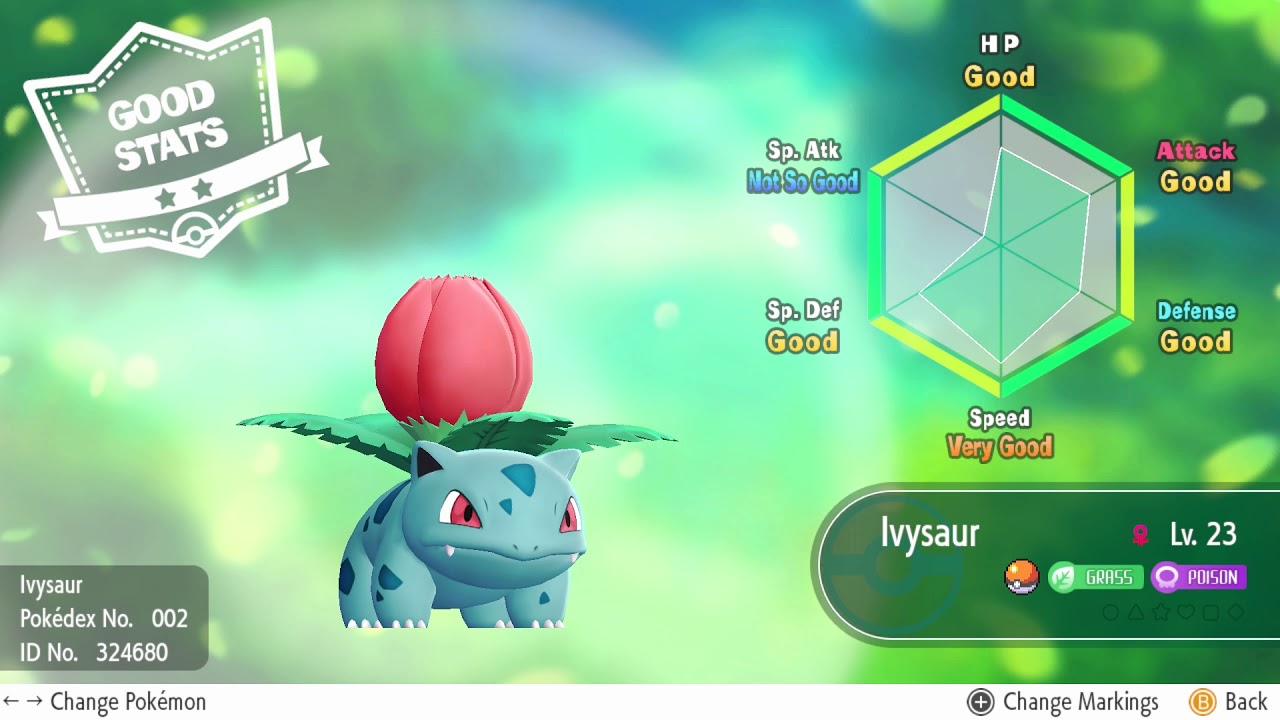

### Cargar los datos


##### Datos crudos


In [228]:
raw_pokemon = pd.read_csv('data/raw/pokemon.csv')

### Algunas preguntas para analizar el dataset

- ¿Qué generación tiene más pokemon?
- ¿Qué generación tiene más legendarios?
- ¿Cuál es el tipo más común entre los pokemon pseudolegendarios?
- ¿Cuál es el tipo más común entre los pokemon legendarios?
- ¿Qué tipo es mejor en cada estadistica?

### Filtrado inicial

In [229]:
df_pokemon = raw_pokemon.copy(deep=True)

##### Filtro de las formas pokemon


In [230]:
sin_gigantamax = df_pokemon[~ (df_pokemon['name'].str[:len('Gigantamax')].str.contains('Gigantamax'))]

In [231]:
sin_megaevo = sin_gigantamax[~ (sin_gigantamax['name'].str[:len('Mega ')].str.contains('Mega '))]

In [232]:
sin_primal = sin_megaevo[~ (sin_megaevo['name'].str[:len('Primal ')].str.contains('Primal '))]

In [233]:
sin_eternamax_eternatus = sin_primal[sin_primal['name'] != 'Eternamax Eternatus']

In [234]:
sin_dada_zarude = sin_eternamax_eternatus[sin_eternamax_eternatus['name'] != 'Dada Zarude']

In [235]:
sin_keldeo_resolute_form = sin_dada_zarude[sin_dada_zarude['name'] != 'Keldeo Resolute Forme']

In [236]:
df_filtrado = sin_keldeo_resolute_form.copy(deep=True)

### Análisis


##### Análisis generacional

In [237]:
generation = (df_filtrado.groupby('generation').size())[1:]

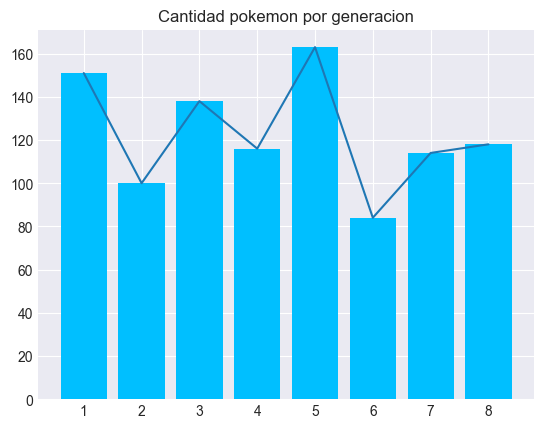

In [238]:
plt.bar([str(i) for i in generation.index],generation,color='deepskyblue')
plt.plot([str(i) for i in generation.index],generation)
plt.title('Cantidad pokemon por generacion')
plt.show()

En esta grafica se puede visualizar la cantidad de pokemon por generacion y el cambio en el transcurir de estas. Siendo la que tiene menos pokemon la sexta generacion y la que más tiene la quinta generacion.

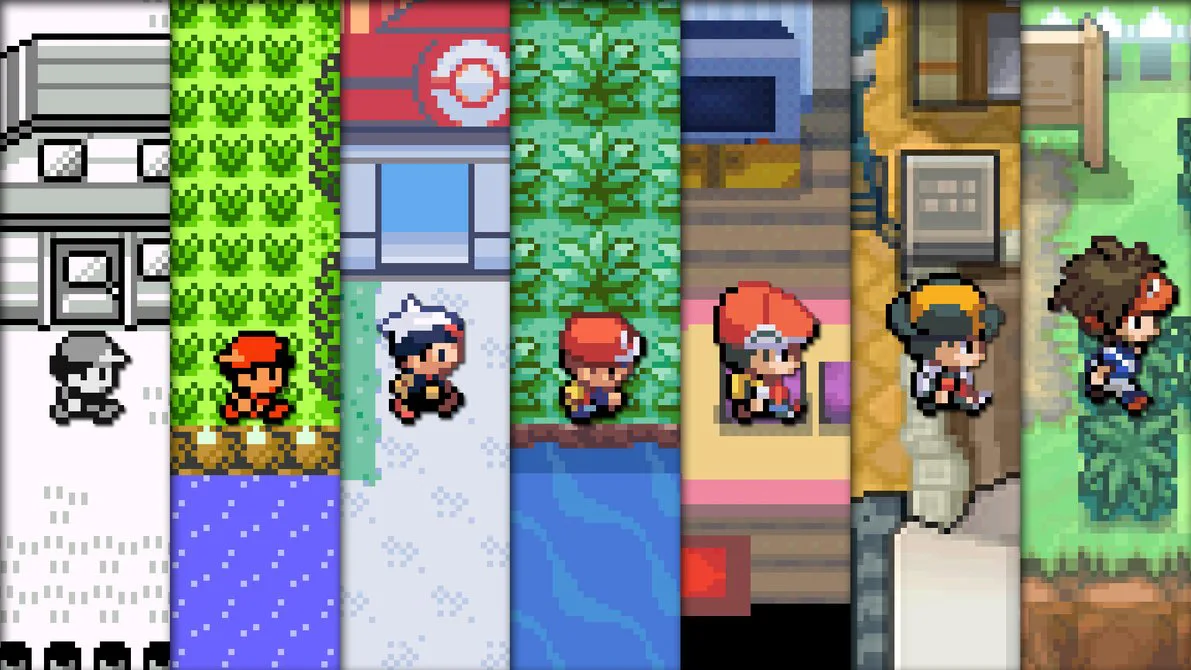

Los pokemones legendarios son pokemons extremadamente raros y normalmente poderosos los cuales normalmente vienen de la mitologia o leyendas del mundo pokemons siendo creadores, heroes o maldiciones del mundo pokemon.

![Legendarios](https://www.latercera.com/resizer/URfpTuSO3QnZFnrx5TdHT4nCBA4=/900x600/smart/arc-anglerfish-arc2-prod-copesa.s3.amazonaws.com/public/JZYFMMWOUBG7FO2SXILEI25MTM.png)

In [239]:
generation_legendary= df_filtrado[df_filtrado['legendary'] == True].groupby('generation').size()[1:]

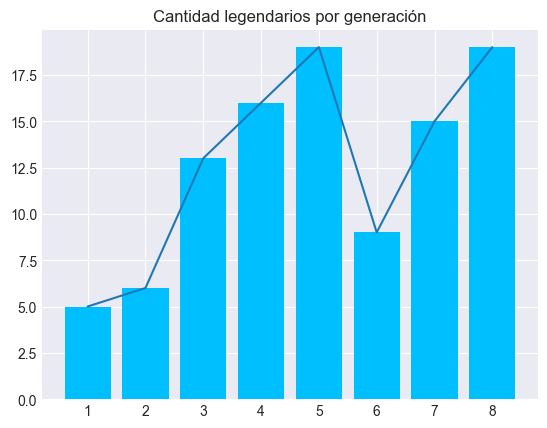

In [240]:
plt.bar([str(i) for i in generation_legendary.index],generation_legendary,color='deepskyblue')
plt.plot([str(i) for i in generation_legendary.index],generation_legendary)
plt.title('Cantidad legendarios por generación')
plt.show()

Las generaciones con más legendarios son la 5 y 8, la quinta porque tiene más pokemon y la octavada debido a que cada DLC traía legendarios.

In [268]:
comparación_cantidad = df_filtrado.groupby('legendary').size()

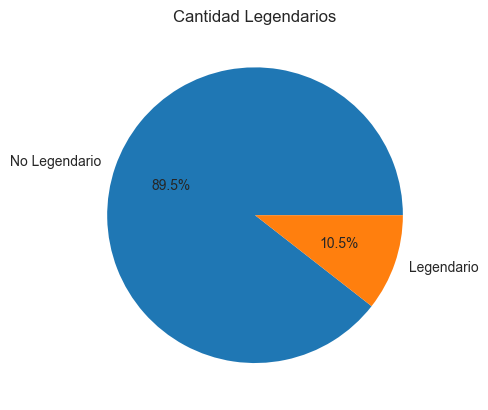

In [274]:
plt.pie(comparación_cantidad,labels=["No Legendario","Legendario"],autopct='%1.1f%%')
plt.title('Cantidad Legendarios')
plt.show()

Solo un 10% de los pokemon son legendarios, debido a qué son místicos y poco comunes

##### Filtrado por tipos

In [241]:
first_type = df_filtrado.drop('type2',axis=1).rename(columns={'type1':'type'})

In [242]:
second_type = df_filtrado[pd.isnull(df_filtrado['type2'])==False].drop('type1',axis=1).rename(columns={'type2':'type'})

In [243]:
one_type_table = pd.concat([first_type,second_type],ignore_index=True).sort_values(by=['number'],ignore_index=True)

In [244]:
one_type_table.loc[one_type_table['type'] == 'Graass', 'type'] = 'Grass'

Habia un error en el nombre del tipo de un pokemon y se corrigio

##### Funcion para darles colores definidos a cada tipo a todas las graficas

In [245]:
colores_por_tipo = {
    'Bug': 'green',
    'Dark': 'black',
    'Dragon': 'blue',
    'Electric': 'yellow',
    'Fairy': 'pink',
    'Fighting': 'brown',
    'Fire': 'red',
    'Flying': 'cyan',
    'Ghost': 'purple',
    'Grass': 'lime',
    'Ground': 'orange',
    'Ice': 'lightblue',
    'Normal': 'gray',
    'Poison': 'darkviolet',
    'Psychic': 'magenta',
    'Rock': 'saddlebrown',
    'Steel': 'darkgray',
    'Water': 'deepskyblue'
}

In [246]:
colores = lambda lista : [colores_por_tipo[i] for i in lista]

##### Cantidad pokemon por tipo

In [247]:
types = one_type_table.groupby('type').size().sort_values(ascending=False)

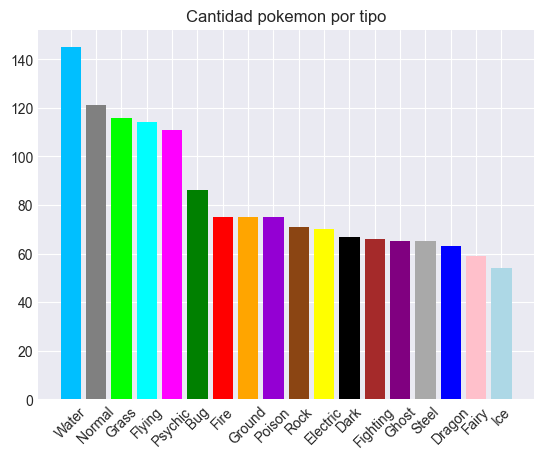

In [248]:
plt.bar(types.index,types,color=colores(types.index))
plt.title('Cantidad pokemon por tipo')
plt.xticks(rotation=45) 
plt.show()

El tipo mas comun de pokemon son los agua debido a la inmensidad de los mares.

![agua](https://pm1.aminoapps.com/6114/aa4650604058c797084881ed3b8cf6f0b6702a8b_00.jpg)

##### Pseudo legendary por tipo

Los pseudo legendary son aquellos pokemon no legendarios que la suma de sus estadisticas son exactamente 600, teniendo siempre 3 etapas evolutivas y una recoleccion de experiencia lenta. Estos pokemon son normalmente los mas fuertes no legendarios de cada region, normalmente no viene mas de 2 por generacion.

![Legendarios](https://static1.thegamerimages.com/wordpress/wp-content/uploads/2019/07/pseudo-legendary-feature.jpg)

In [249]:
pseudo_legendary = one_type_table[(one_type_table['total'] == 600) & (one_type_table['legendary'] == False)].groupby('type').size()


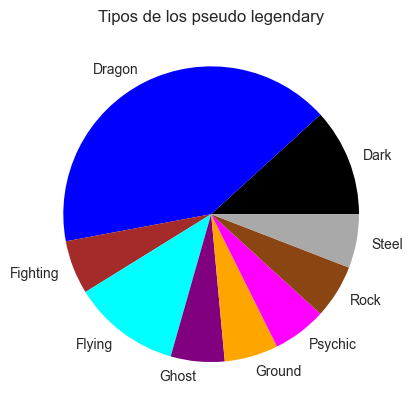

In [250]:
plt.pie(pseudo_legendary,labels=pseudo_legendary.index,colors=colores(pseudo_legendary.index))
plt.title('Tipos de los pseudo legendary')
plt.show()

En esta grafica se evidencia que la mayoria de pseudo legendary son tipo dragon, posiblemente al mistisismo que enrolla al tipo dragon como raros y poderosos.

##### Legendary por tipo

In [251]:
legendarys = one_type_table[one_type_table['legendary'] == True].groupby('type').size().sort_values(ascending=True)

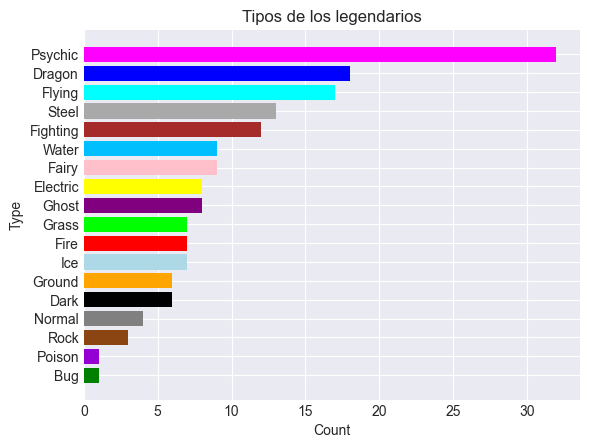

In [252]:
plt.barh(legendarys.index, legendarys, color=colores(legendarys.index))
plt.title('Tipos de los legendarios')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

La mayoria de los pokemon legendarios son tipo psychic debido que es un tipo relacionado a los mitico y lo que no es de este mundo y a que en la primera generacion este tipo fue creador para ser el mas fuerte de todos asi que por motivos de diseno hicieron a muchos de los legendarios sean de este tipo

![mewtwo](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRIdLthn8T72mkehN7Oa9f0CgBP6XzFER1Q5Z5ahT8U7g&s)

Mewtwo, el primer legendario tipo pyshic y el mas poderoso de su generacion 


##### Comparación tipos por cada estadistica 

In [253]:
hp_bytype = one_type_table.groupby('type')['hp'].median().sort_values(ascending=False)

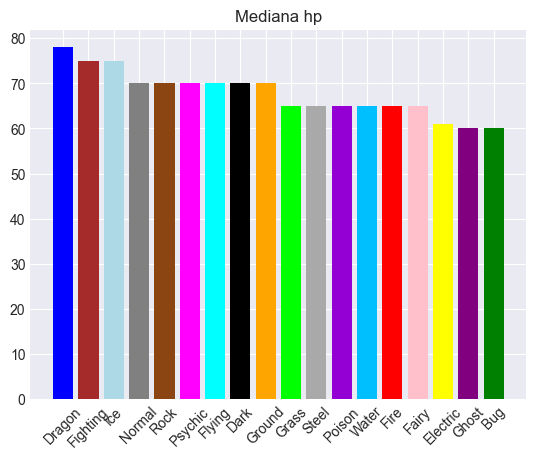

In [254]:
plt.bar(hp_bytype.index,hp_bytype,color=colores(hp_bytype.index))
plt.title('Mediana hp')
plt.xticks(rotation=45) 
plt.show()

En la gráfica se puede notar que los tipo dragon son los que tienen más HP debido a que son grandes y resistentes, por otro lado los tipo bug son los que tienen menos debido a que son más pequeños y menos resistentes.

In [255]:
attack_bytype = one_type_table.groupby('type')['attack'].median().sort_values(ascending=False)

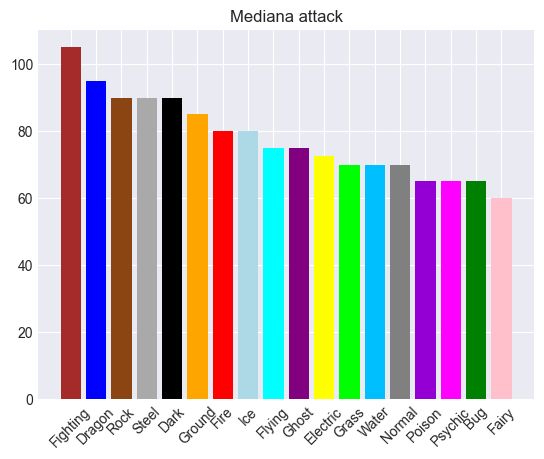

In [256]:
plt.bar(attack_bytype.index,attack_bytype,color=colores(attack_bytype.index))
plt.title('Mediana attack')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede notar que el tipo con mayor attack es el tipo fighting, esto podria ser debido a que el tipo de basa mayormente en los deporte de contacto.
Los tipos con menos attack son el tipo psychic y fairy, esto podria deberse a que la idea de estos tipos son los poderes especiales, para los fairy poderes magicos y para los psychic poderes psiquicos.

In [257]:
defense_bytype = one_type_table.groupby('type')['defense'].median().sort_values(ascending=False)

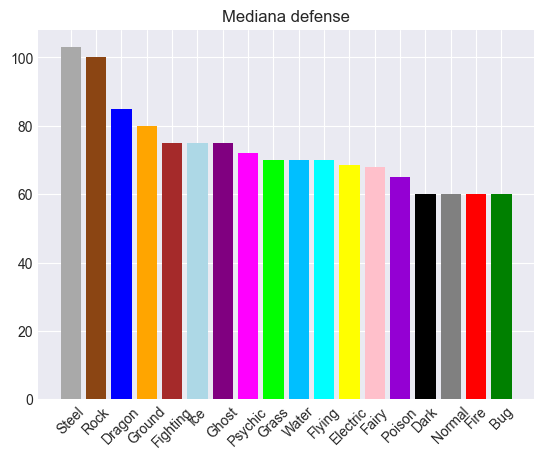

In [258]:
plt.bar(defense_bytype.index,defense_bytype,color=colores(defense_bytype.index))
plt.title('Mediana defense')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede evidenciar que los tipos steel and rock son los que tienen mas defense ya que el concepto de estos tipos son de materiales duros y resistentes.

In [259]:
sp_attack_bytype = one_type_table.groupby('type')['sp_attack'].median().sort_values(ascending=False)

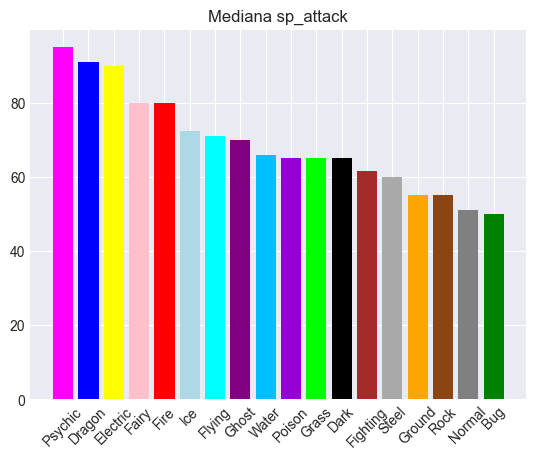

In [260]:
plt.bar(sp_attack_bytype.index,sp_attack_bytype,color=colores(sp_attack_bytype.index))
plt.title('Mediana sp_attack')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede reconocer que los tipo psychic son los que tienen mas sp_attack debido a que la mayoria de ellos atacan con la mente.

In [261]:
sp_defense_bytype = one_type_table.groupby('type')['sp_defense'].median().sort_values(ascending=False)

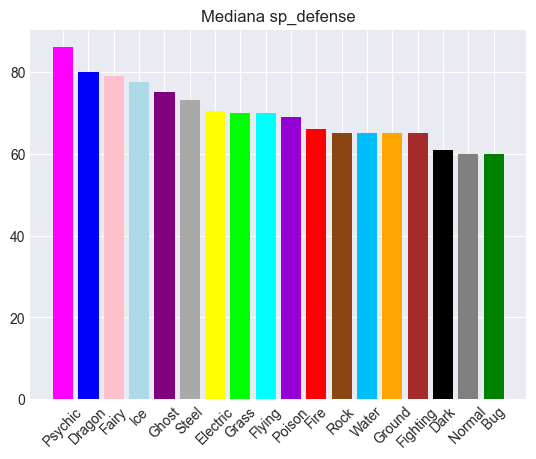

In [262]:
plt.bar(sp_defense_bytype.index,sp_defense_bytype,color=colores(sp_defense_bytype.index))
plt.title('Mediana sp_defense')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede reconocer que los tipo psychic son los que tienen mas sp_defense debido a que su gran poder mental los puede proteger de ataque no tangentes.

In [263]:
speed_bytype = one_type_table.groupby('type')['speed'].median().sort_values(ascending=False)

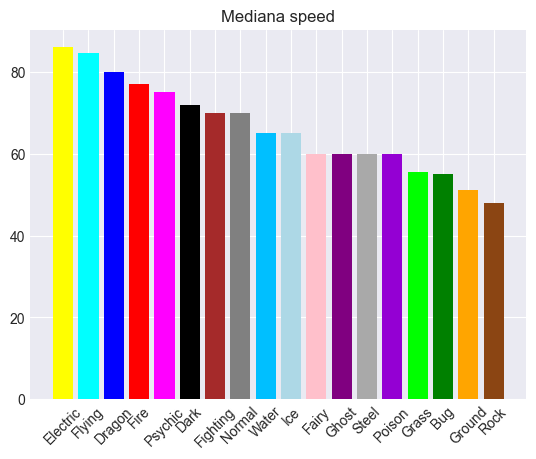

In [264]:
plt.bar(speed_bytype.index,speed_bytype,color=colores(speed_bytype.index))
plt.title('Mediana speed')
plt.xticks(rotation=45) 
plt.show()

En la grafica se puede reconocer que los tipo electric son los que tienen mas speed debido a que la mayoria tiene la velocidad del rayo lo cual los hace rapidos.

In [265]:
df_filtrado.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
5,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
6,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
